## Title : 1985 Auto Imports Database Analyses

In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

## Businesscase:-to predict which car is more risky or less risky?
#### Multi class class classification

## Basic Checks

In [2]:
data = pd.read_csv("imports-85.csv",na_values=['?']) # Reading the Data
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [3]:
data.tail(7)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
199,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [3]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
data.describe(include='O')

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.4,68,5500,?
freq,41,32,185,168,114,96,120,202,148,159,94,23,20,19,37,4


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## Basic Understanding of Features --> Domain Analysis
1. Output variable/Target Variable symboling: A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.[its assigned insurance risk rating -> [-3, -2, -1, 0, 1, 2, 3]]
      
2. normalized-losses:  its normalized losses in use as compared to other cars. It is the relative average loss payment per insured vehicle year. This value is nor- malized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc.), and represents the average loss per car per year. [average loss payment per insured vehicle year -> continuous from 65 to 256.]

3. make:Name of the car manufacturers.It was no direct relation with target variable. [ Manufacturer name eg : alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu etc. ]

4. fuel-type: What type of fuel car is using[diesel, gas]

5. aspiration:Most automobile petrol engines, as well as many small engines used for non-automotive purposes, are naturally aspirated.[3] Most modern diesel engines powering highway vehicles are turbocharged to produce a more favourable power-to-weight ratio, a higher torque curve, as well as better fuel efficiency and lower exhaust emissions. Turbocharging is nearly universal on diesel engines that are used in railroad, marine engines, and commercial stationary applications (electrical power generation, for example). Forced induction is also used with reciprocating aircraft engines to negate some of the power loss that occurs as the aircraft climbs to higher altitudes. [std, turbo]

6. num-of-doors: The number of doors a car is having. with this feature there is no direct relation with target variable. [four, two].

7. body-style:Types of body of cars. It does not have direct relationship with risk factors. [hardtop, wagon, sedan, hatchback, convertible]

8. drive-wheels:Adrive wheel is a wheel of a motor vehicle that transmits force, transforming torque into tractive force from the tires to the road, causing the vehicle to move. The powertrain delivers enough torque to the wheel to overcome stationary forces, resulting in the vehicle moving forwards or backwards [4wd, fwd, rwd]

9. engine-location: Where the engine is located, with this column no direct relation is there with target variable. [front, rear]

10. wheel-base: the effect the wheelbase has on the weight distribution of the vehicle, wheelbase dimensions are very important to the balance and steering. In high performance vehicles a longer wheelbase is more stable at higher speeds. A short wheelbase vehicle is usually able to corner faster but may be less aerodynamic.[continuous from 86.6 120.9]

11. length:current PBS level 1 vehicles have a working maximum length limit of 20 m. Although 
    longer vehicles may meet all Level 1 requirements, these vehicles are usually only allowed to 
    operate on specific routes on PBS Level 1 networks after an individual assessment. This 
    work looks at the relative effects of increasing the length in 1 m increments to a maximum of 
    26 m, which is the current working maximum length limit for PBS Level 2A networks. 
    There was also an interest in examining the relative differences for 19 m vehicles. [continuous from 141.1 to 208.1]
    
12. width:New small cars are safer than they've ever been, but new larger, heavier vehicles are still safer than small ones. ... In its studies, the Insurance Institute for Highway Safety (IIHS) has found that a heavier vehicle will typically push a lighter one backward during the impact. so width has direct relation to risk factors. [continuous from 60.3 to 72.3]

13. height: [continuous from 47.8 to 59.8]

14. curb-weight: The “curb weight” of your car is the weight of the vehicle without any passenger  [continuous from 1488 to 4066]

15. engine-type: [dohc, dohcv, l, ohc, ohcf, ohcv, rotor]

16. num-of-cylinders:Most cars and SUV engines have four, six, or eight cylinders. Generally, an engine with more cylinders produces more power, while an engine with fewer cylinders gets better fuel economy. so we can say if number of cylinder increases risk foctor in cars dicreases. [eight, five, four, six, three, twelve, two]

17. engine-size:Engine size is the volume of fuel and air that can be pushed through a car’s cylinders and is measured in cubic centimetres (cc). Car engine sizes are normally specified in litres, which is rounded up to the nearest tenth of a litre. For example, a car that has a 1390cc engine would be described as a 1.4 litre.Traditionally, a car with a bigger engine would generate more power than a car with a smaller engine. However, some modern cars have turbocharged engines, which allows them to be more powerful than they used to be. so we can say cars with bigger engine have less chance of risk. [continuous from 61 to 326]

18. fuel-system:A vehicle's fuel system comprises components that deliver fuel from the tank to the engine, including a fuel pump, fuel lines, a fuel-pressure regulator, fuel filter and fuel injectors. Fuel system components are built to last, so the fuel filter is the only part that's likely to require replacement on a schedule. [1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi]

19. bore:A vehicle's fuel system comprises components that deliver fuel from the tank to the engine, including a fuel pump, fuel lines, a fuel-pressure regulator, fuel filter and fuel injectors. Fuel system components are built to last, so the fuel filter is the only part that's likely to require replacement on a schedule.Boring out engine cylinders helps clear them of debris that can build up over years of use. Boring an engine is best left to professional mechanics, as a botched job can lead to major problems. If the bore isn't done correctly it can result in engine knock. [continuous from 2.54 to 3.94]

20. stroke:A phase of the engine's cycle (e.g. compression stroke, exhaust stroke), during which the piston travels from top to bottom or vice versa.The type of power cycle used by a piston engine (e.g. two-stroke engine, four-stroke engine)."Stroke length", the distance travelled by the piston during each cycle. The stroke length––along with bore diameter––determines the engine's displacement. [continuous from 2.07 to 4.17]

21. compression-ratio: High compression increases your risk of knocking, which is why very high compression engines run high octane race gas or (more commonly now) E85. Gases tend to heat up when they're compressed, so the increased heat density could lead to the fuel prematurely combusting before the spark plug ignites it.[continuous from 7 to 23]

22. horsepower:Horsepower (hp) is the metric used to indicate the power produced by a car's engine - the higher the number, the more power is sent to the wheels and, in theory, the faster it will go. However, in reality, there are other elements such as the weight of the car that will also affect a car's outright speed [continuous from 48 to 288]

23. peak-rpm: [continuous from 4150 to 6600]

24. city-mpg: the mileage which is car giving in the city. [continuous from 13 to 49]

25. highway-mpg:The mileage of a car in highway. [continuous from 16 to 54]

26. Price:Price of each Cars,We can say that high price Cars should have low risk factors [continuous from 5118 to 45400]


This data set consists of three types of entities:
(a) the specification of an auto in terms of various characteristics
(b)its assigned insurance risk rating
(c) its normalized losses in use as compared to other cars.¶

## Exploratory Data Analysis


###  Univariate Analysis --> Analyzing Single Variable

In [82]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [83]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
## Renaming certain columns just to make analysis easy
data.rename(columns={'normalized-losses':'normalized_losses','fuel-type':'fuel_type',
                     'num-of-doors':'num_of_doors',
                     'body-style':'body_style','drive-wheels':'drive_wheels','engine-location':'engine_location','wheel-base':'wheel_base'
                    ,'curb-weight':'curb_weight','engine-type':'engine_type','num-of-cylinders':'num_of_cylinders','engine-size':'engine_size',
                     'fuel-system':'fuel_system','compression-ratio':'compression_ratio','peak-rpm':'peak_rpm','city-mpg':'city_mpg','highway-mpg':'highway_mpg'}
            ,inplace=True)

In [7]:
data.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [ ]:
# Replace '-' in column names with '_'
names = []
for name in df_3.columns:
    names.append(name.replace('-', '_'))

df_3.columns = names

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


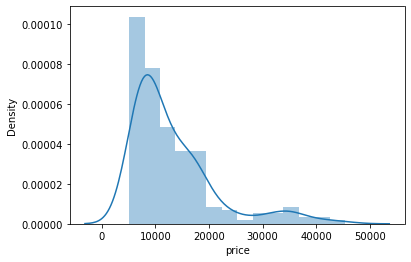

In [6]:
## Analyzing price
sns.distplot(data.price)
plt.show()
## The data is normally distributed with right skewness
## maximum cars price is between 5000 to 18000
## very few cars are in range of 30000 to 45000 so we can say there are less costly cars
## less costly cars are intend to high risk factors


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


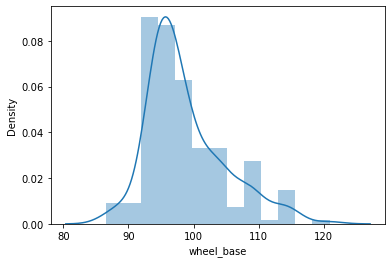

In [86]:
## Analyzing wheel-base
sns.distplot(data.wheel_base)
plt.show()
## data is normally distributed with right skewness
## most data is concentrated between 92-105


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


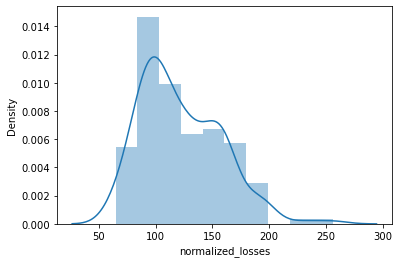

In [87]:
## Analyzing normalize loss
sns.distplot(data.normalized_losses)
plt.show()
## data is normally distributed having some outliers in 200 to 250 range'
## maximum data lies between 60 to 170

?      41
161    11
91      8
150     7
134     6
128     6
104     6
74      5
102     5
85      5
103     5
95      5
168     5
94      5
65      5
93      4
148     4
106     4
118     4
122     4
101     3
115     3
154     3
83      3
125     3
137     3
164     2
119     2
192     2
108     2
129     2
113     2
110     2
153     2
89      2
145     2
81      2
87      2
197     2
158     2
194     2
188     2
90      1
142     1
77      1
231     1
186     1
121     1
78      1
98      1
107     1
256     1
Name: normalized-losses, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


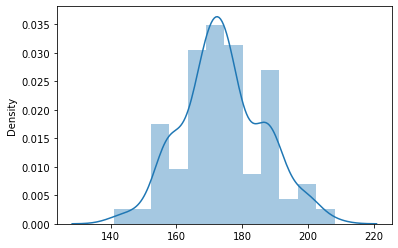

In [60]:
## Analyzing length
sns.distplot(x=data.length)
plt.show()
## data is normally distributed with kurtosis
## data is concentrated between 165-180

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


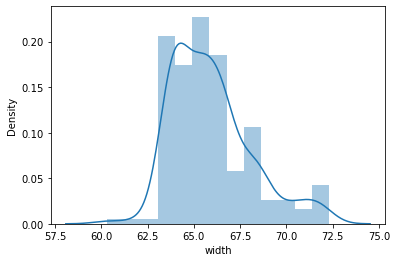

In [62]:
# Analyzing  width
sns.distplot(data.width)
plt.show()
# data is normally distributed
# most data are lies between 63 to 67

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


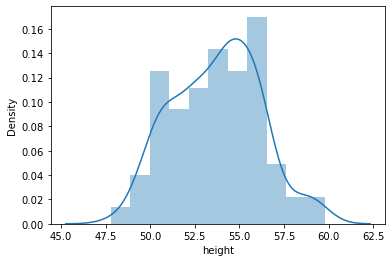

In [63]:
# Analyzing height
sns.distplot(data.height)
plt.show()
# data is normally distributed with negative skewness
# most data lies in range 50-56

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


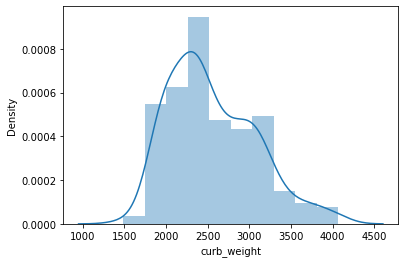

In [88]:
# Analyzing curb-weight
sns.distplot(data.curb_weight)
plt.show()
# the data is normally distributed
# it is showing that curb-weight is starting from 1500 to 4000
# most of the cars have cub-weight between 1700- 3200

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


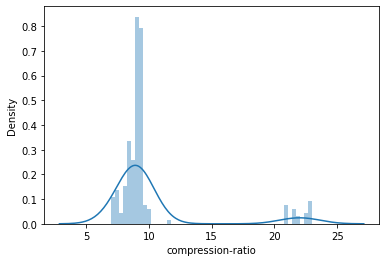

In [65]:
## Analyzing compression ratio
sns.distplot(data.compression_ratio)
plt.show()
## in this data column we can see some outliers
## the data is almost has a normal distribution
## most cars are having compression ration between the range of 6 to 10

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


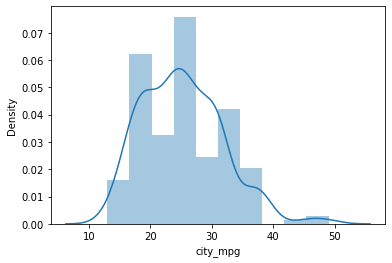

In [130]:
## analyzing city-mpg
sns.distplot(data.city_mpg)
plt.show()
## normally distributed data
## most cars are having city-mpg between 15 to 35
## very few cars are having high city mpg like between 40-50

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


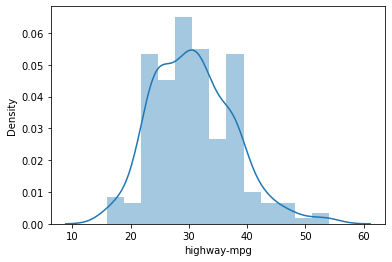

In [67]:
## analyzing highway mpg
sns.distplot(data.highway_mpg)
plt.show()
## normally distributed data
## most cars are having highway mpg between 20 to 40


In [68]:
data.price.value_counts()


?        4
7957     2
7898     2
8495     2
8921     2
        ..
15580    1
18950    1
7788     1
11245    1
16900    1
Name: price, Length: 187, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


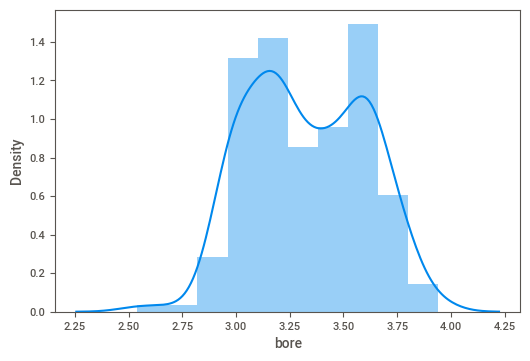

In [24]:
## Analysing bore
sns.distplot(data.bore)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


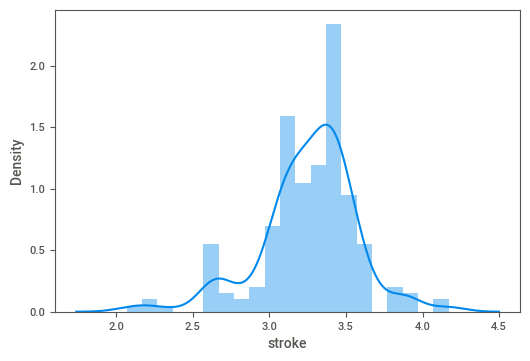

In [25]:
## Analyzing stroke
sns.distplot(data.stroke)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


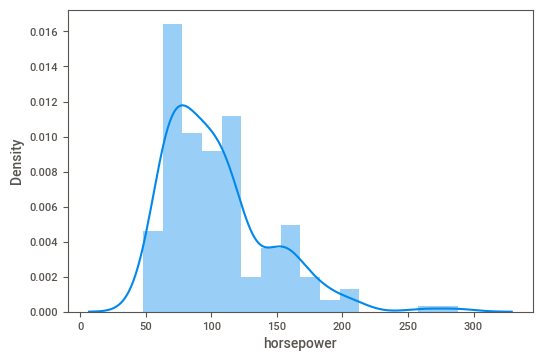

In [26]:
## Analyzing horsepower
sns.distplot(data.horsepower)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


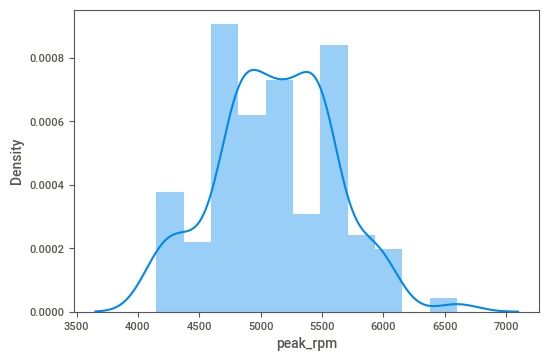

In [27]:
## Analyzing peak_rpm
sns.distplot(data.peak_rpm)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


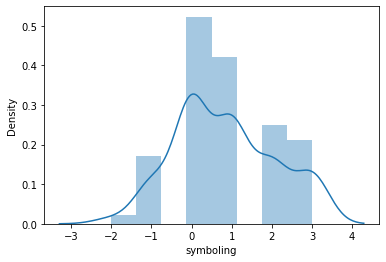

In [4]:
## Analysis target variable
sns.distplot(data.symboling)
plt.show()
## data of symboling is ranging from -2 to 3
## it is normally distributed
## A value of +3 indicates that the auto is risky,
 ## -3 that it is probably pretty safe.
## data value is maximum at point 0, so there are more data that can't predict the auto is risky or
## safe or we can say as it is nutral
## there is more auto with risk factors than safe auto

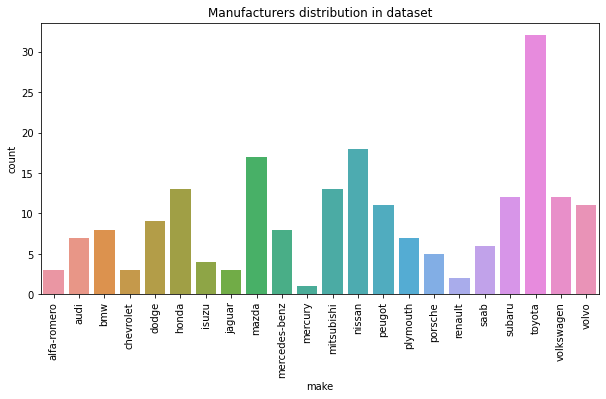

In [4]:

plt.figure(figsize=(10,5))
sns.countplot(x='make', data=data)
plt.xticks(rotation='vertical')
plt.title('Manufacturers distribution in dataset')
plt.show()
## from the plot we can say top selling car is Toyota
## least selling car is mercury

## Categorical Feature distributions

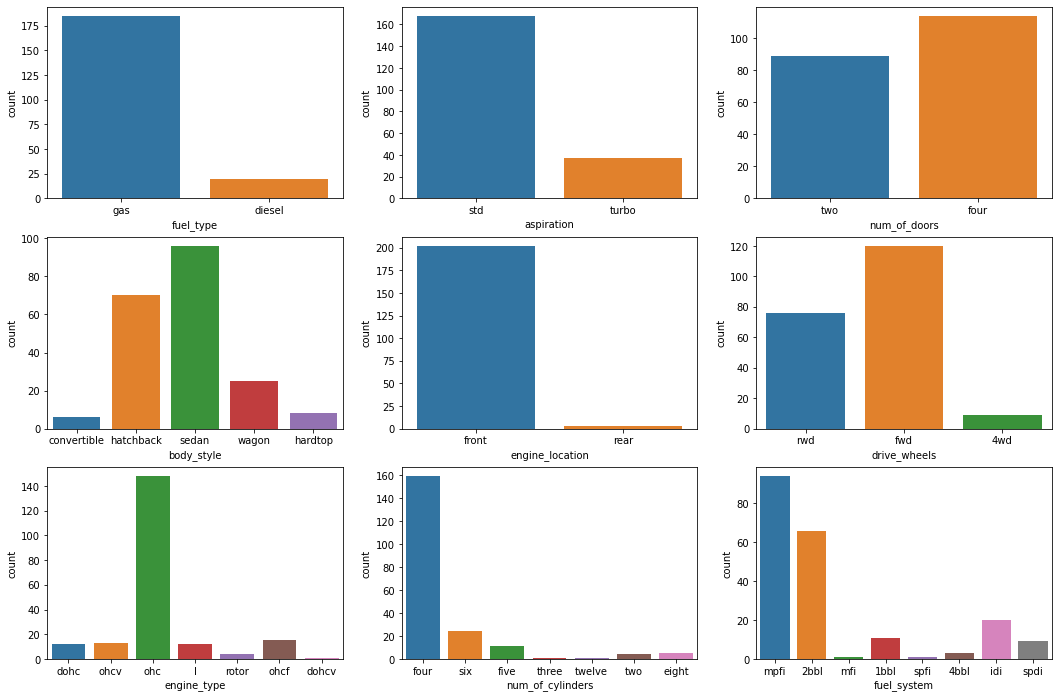

In [8]:
categorical = ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'engine_location',
               'drive_wheels', 'engine_type', 'num_of_cylinders', 'fuel_system']
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
for col, ax in zip(categorical[1:], axs.ravel()):
    sns.countplot(x=col, data=data, ax=ax)

## Bivariate Analysis -- Analyzing 2 variables at a time

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


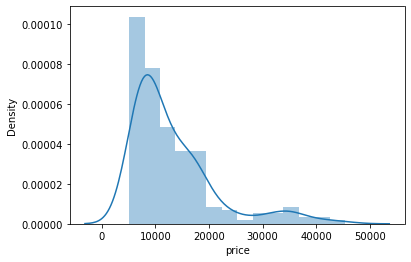

In [89]:
## Analsyzing target variable
sns.distplot(data.price)
plt.show()
# it is a normally distributed curve
## maximum cars have price in between 5000 to 19000
## very few cars are in high range of 29000 to 45000

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [11]:
data1=data[['symboling','normalized_losses','wheel_base','length','width','height','curb_weight','engine_size',
            'bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']]

In [12]:
data1

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [9]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=data1[column].dropna(axis=0)
                        ,y=data.price)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

NameError: name 'data1' is not defined

<Figure size 1440x1800 with 0 Axes>

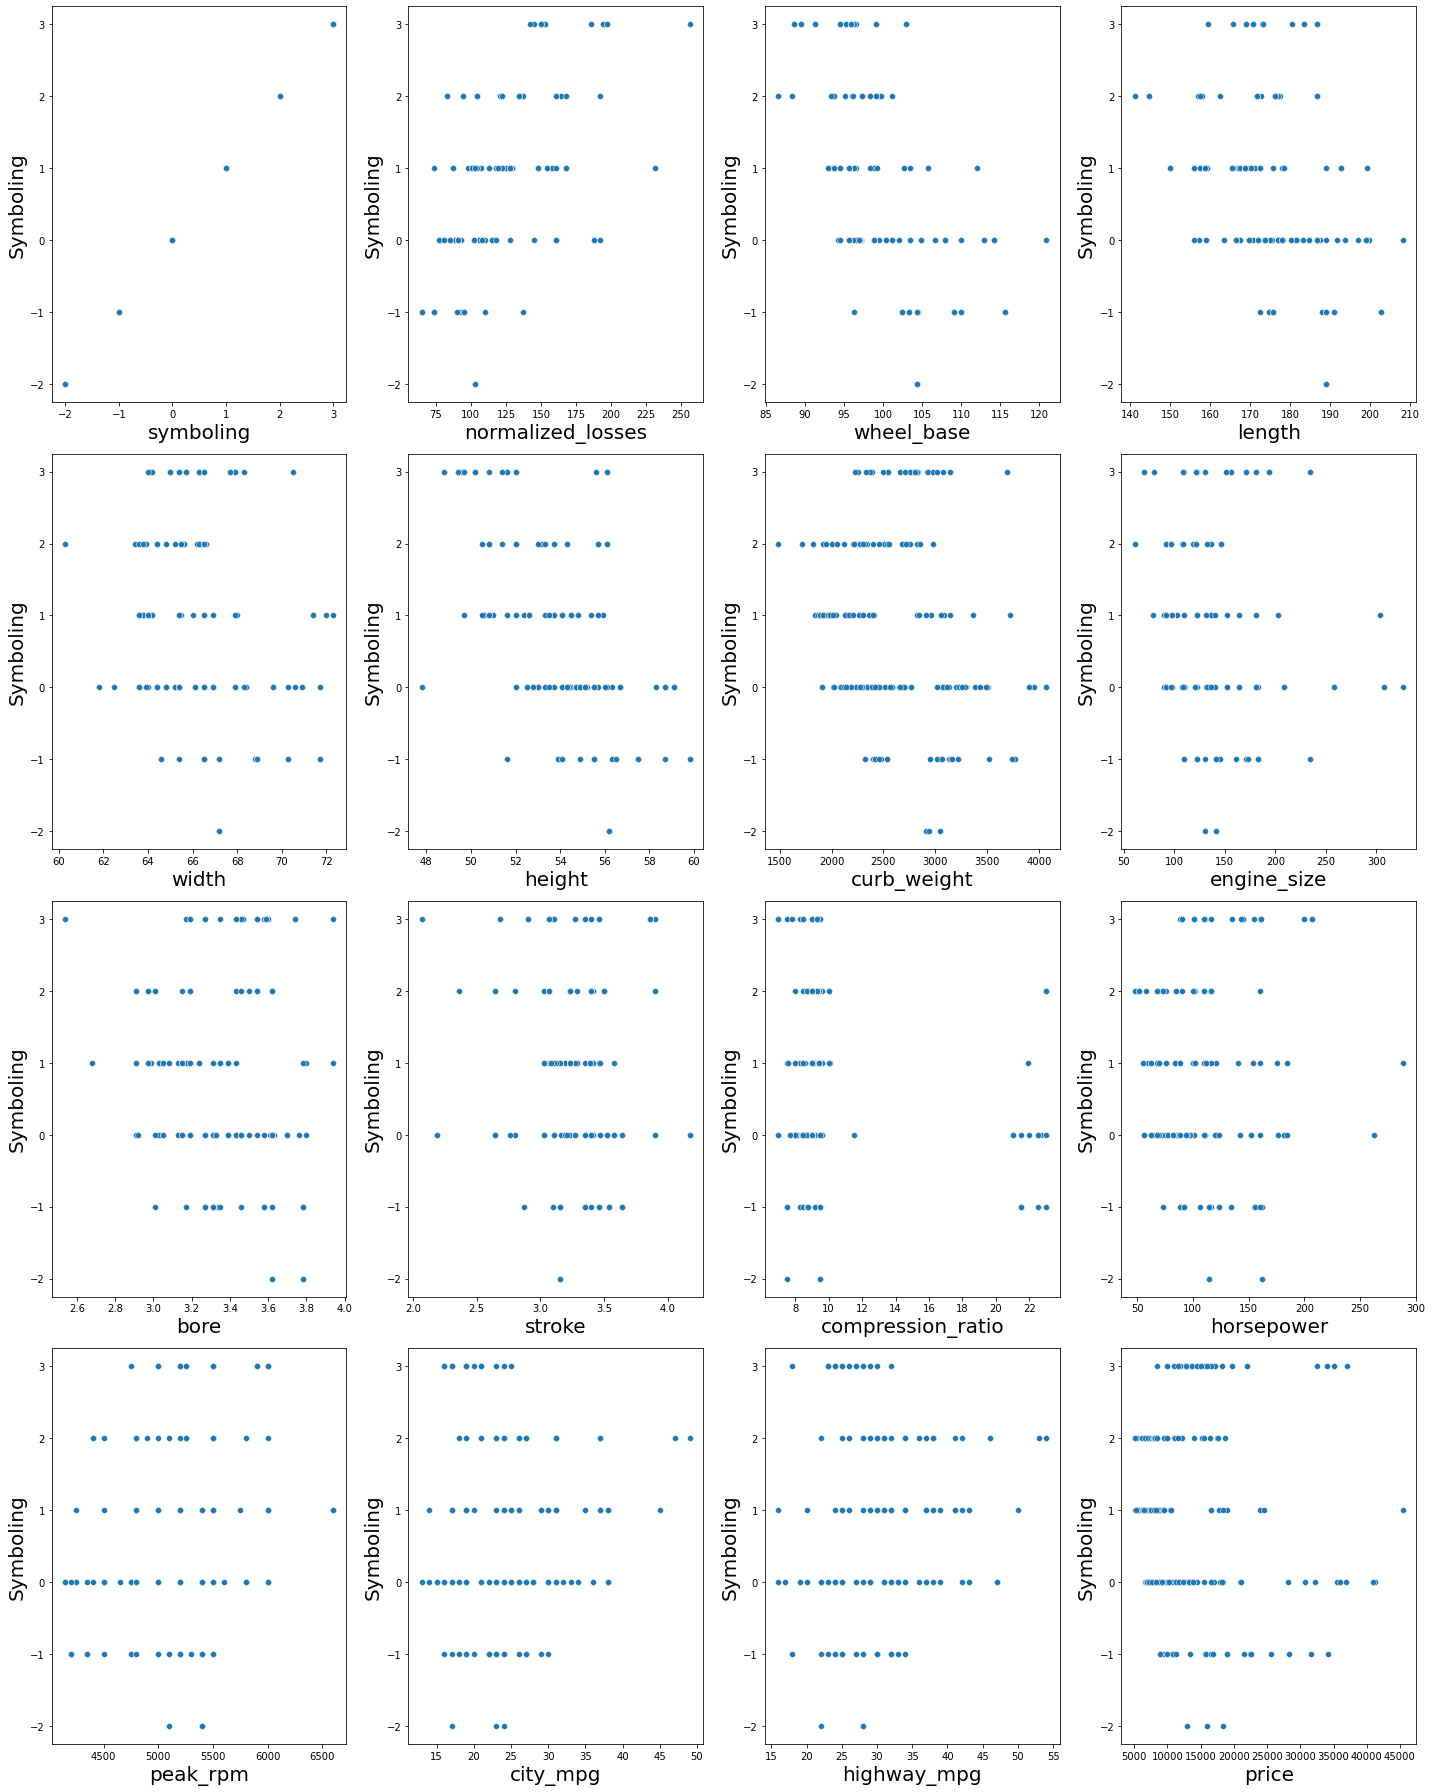

In [13]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=17 :
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=data1[column].dropna(axis=0)
                        ,y=data.symboling)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Symboling',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Great, the relationship between the dependent and independent variables look fairly linear.
Thus, our linearity assumption is satisfied.

## Insights from BiVariate Analysis
1. Normalised losses: the cars having Symbol 3 having normalized loss in between 125 to 250, so it means cars having high risk factor their normalised loss also increased.
2. Wheel_base:high Symboling cars(1-3) have wheel_base range between 90 to 110,low symboling cars(0 to -2) have Wheel_base range between 95 to 120, so we can say that High Wheel_base tends to low risk the cars
3. length:Which cars length is between 140 to 190 have high Symboling range(1 to 3), and the cars length between 0 to -2 having low symboling , so we can say taller cars have less risk factors
4. width: high symboling cars(2-3) have width between 63 to 68 and low symboling cars(-2 to 1) having width in between 64 to 72, it also showing that if width is high then there is low risk factors in cars.
5. height: high symboling cars(1-3) have height in between  50 to 56, low symboling cars(-2 to 0) have height in range of 52 to 60, here also we can say more height in cars tends to low risk factors
6. curb_weight : high symboling cars(1-3) having curb_weight between 1500-3000 and low symboling cars(-2to 0) having curb_weight between 2000 to 4000, here we can say that high curb_weight tends to low risk factors in cars.
7. engine_size: when engine size is between 50-200 cars are having high symboling value(1-3) and low symboling cars(-2 to 0) are havimg engine_size between 100 to 300, so if engine_size is big then cars are having low risk factors.
8. bore: almost are cars have bore in range of 2.8 to 4, but we can see that low symboling cars have bore in range of 3.2 to 4 so we can say if bore is increased cars may have low risk foactors.
9. stroke: maximum cars have stroke in range of 2.5 to 3.5 and high symboling cars(1-3) have less strokes than low symboling cars(-2 to 0).
10. compression_ratio: high symboling cars(1-3) have compression ratio between 8 to 12 and low symboling cars(-2 to 0) have compression ration between 8 to 23, from this feature we can not clearly say that compression ration affects risk factors in cars or not, but we can see that some of low symboling cars(-1 to 0) have high compression ratio than high symboling cars(1-3).
11. horsepower: almost all cars are having horsepower in range between 50 to 200, so from this feature we can not say anything about risk factors in cars.
12. peak_rpm: almost all are are having peak_rpm in between 3500 to 6000,in the distribution we can see low symboling cars are having less peak_rpm(between 5500) but still we can not say clearly that peak_rpm affetcs risk factors in cars or not.
13. city_mpg: high symboling cars(1-3) have city_mpg between 17 to 36 and low symboling cars(-2 to 0) have city mpg between 10 to 35, almost max limit for city_mpg of all are same, but cars with low risk factor have less city_mpg.
14. highway_mpg : high symboling cars(1-3) have highway_mpg between 25 to 45 and low symboling cars(-2 to 0) have 15 to 35, so we can say if highway_mpg is less then cars have less risk factors.
15. price: high symboling cars(1-3) have price in range between 5000 to 25000 but very few cars of high risk factors have price in between 35000 to 45000, low symboling cars(-2 to 0) have price in range of 10000 to 40000, so here we can say if a car's price is high then risk factors are less.

In [14]:
import sweetviz as sv
my_report = sv.analyze(data)## pass the original dataframe
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Data Preprocessing

In [137]:
## get the missing values
data.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [ ]:
## Imputing the missing values 
## Since normalized_losses,bore,stroke,horsepower,peak_rpm,price has shown normal distribution with skewness so median can be better substitute to impute missing values.
## num_of_doors is categorical data so mode imputation can be used.

In [16]:
## Getting the rows where values got missed
data.loc[data['normalized_losses'].isnull()==True]


,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


In [17]:
## Impuation using inbuild method fillna.
data['num_of_doors'] = data['num_of_doors'].fillna(data['num_of_doors'].mode()[0])

data['normalized_losses'] = data['normalized_losses'].fillna(data['normalized_losses'].median())

data['bore']  = data['bore'].fillna(data['bore'].median())

data['stroke']  = data['stroke'].fillna(data['stroke'].median())

data['horsepower']  = data['horsepower'].fillna(data['horsepower'].median())

data['peak_rpm']  = data['peak_rpm'].fillna(data['peak_rpm'].median())

data['price']  = data['price'].fillna(data['price'].median())

In [18]:
data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num_of_doors       205 non-null    int64  
 6   body_style         205 non-null    int64  
 7   drive_wheels       205 non-null    int64  
 8   engine_location    205 non-null    int64  
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    int64  
 15  num_of_cylinders   205 non-null    int64  
 16  engine_size        205 non

In [22]:
## There are categorical data need to convert them into numerical

In [23]:
data.num_of_cylinders.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In [19]:
data.num_of_cylinders=data.num_of_cylinders.map({'four':1,'six':2,'five':3,'eight':4,'two':5,'three':6,'twelve':7})

In [94]:
data.engine_type.value_counts()

1    148
2     15
3     13
5     12
4     12
6      4
7      1
Name: engine_type, dtype: int64

In [20]:
data.engine_type=data.engine_type.map({'ohc':1,'ohcf':2,'ohcv':3,'dohc':4,'l':5,'rotor':6,'dohcv':7})

In [30]:
data.num_of_doors.value_counts()

four    116
two      89
Name: num_of_doors, dtype: int64

In [21]:
data.num_of_doors=data.num_of_doors.map({'four':1,'two':2})

In [34]:
data.fuel_type.value_counts()

gas       185
diesel     20
Name: fuel_type, dtype: int64

In [22]:
data.fuel_type=data.fuel_type.map({'gas':1,'diesel':2})

In [65]:
data.aspiration.value_counts()

1    168
2     37
Name: aspiration, dtype: int64

In [23]:
data.aspiration=data.aspiration.map({'std':1,'turbo':2})

In [40]:
data.body_style.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64

In [24]:
data.body_style=data.body_style.map({'sedan':1,'hatchback':2,'wagon':3,'hardtop':4,'convertible':5})

In [43]:
data.drive_wheels.value_counts()

fwd    120
rwd     76
4wd      9
Name: drive_wheels, dtype: int64

In [25]:
data.drive_wheels=data.drive_wheels.map({'fwd':1,'rwd':2,'4wd':3})

In [150]:
data.engine_location.value_counts()

1    202
2      3
Name: engine_location, dtype: int64

In [26]:
data.engine_location=data.engine_location.map({'front':1,'rear':2})

In [85]:
data.fuel_system.value_counts()

1    94
2    66
3    20
4    11
5     9
6     3
8     1
7     1
Name: fuel_system, dtype: int64

In [27]:
data.fuel_system=data.fuel_system.map({'mpfi':1,'2bbl':2,'idi':3,'1bbl':4,'spdi':5,'4bbl':6,'mfi':7,'spfi':8})

In [52]:
data.make.value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
chevrolet         3
alfa-romero       3
jaguar            3
renault           2
mercury           1
Name: make, dtype: int64

In [28]:
data.make=data.make.map({'toyota':1,'nissan':2,'mazda':3,'honda':4,'mitsubishi':5,'volkswagen':6,
                         'subaru':7,'volvo':8,'peugot':9,
                        'dodge':10,'bmw':11,'mercedes-benz':12,'plymouth':13,'audi':14,'saab':15,'porsche':16,'isuzu':17,
                         'chevrolet':18,'alfa-romero':19,'jaguar':20,'renault':21,'mercury':22})

In [54]:
data.make.value_counts()

1     32
2     18
3     17
4     13
5     13
6     12
7     12
8     11
9     11
10     9
11     8
12     8
13     7
14     7
15     6
16     5
17     4
18     3
19     3
20     3
21     2
22     1
Name: make, dtype: int64

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    float64
 2   make               205 non-null    int64  
 3   fuel_type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num_of_doors       205 non-null    int64  
 6   body_style         205 non-null    int64  
 7   drive_wheels       205 non-null    int64  
 8   engine_location    205 non-null    int64  
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    int64  
 15  num_of_cylinders   205 non-null    int64  
 16  engine_size        205 non

In [29]:
## Checking zero value
data.loc[data['price']==0]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


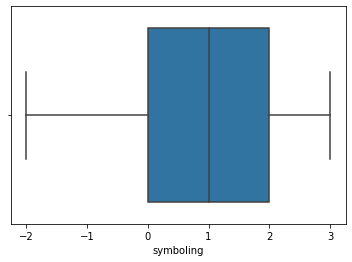

In [22]:
## chekcing the outliers
sns.boxplot(data.symboling)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


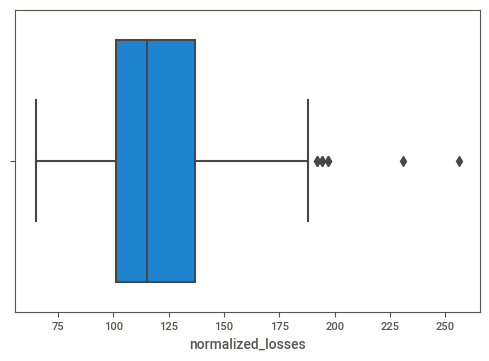

In [30]:
sns.boxplot(data.normalized_losses)
plt.show()
## have some outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


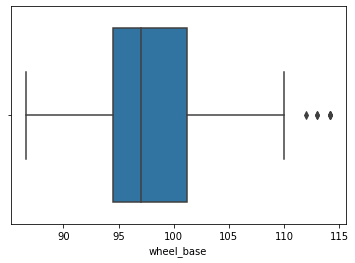

In [37]:
sns.boxplot(data.wheel_base)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


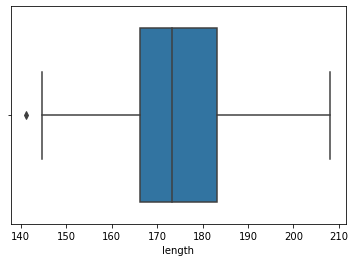

In [80]:
sns.boxplot(data.length)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


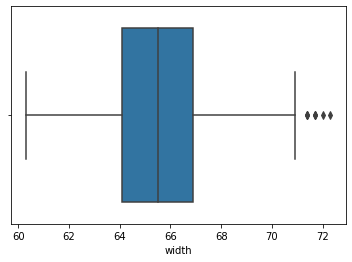

In [100]:
sns.boxplot(data.width)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


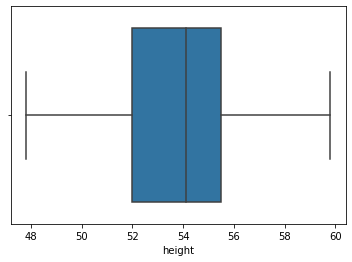

In [101]:
sns.boxplot(data.height)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


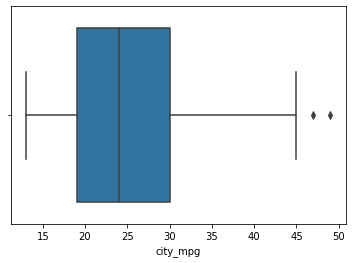

In [102]:
sns.boxplot(data.city_mpg)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


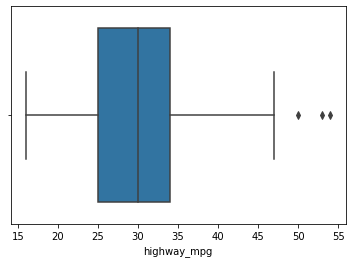

In [103]:
sns.boxplot(data.highway_mpg)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


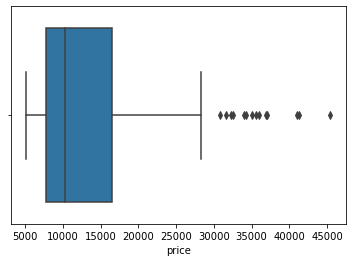

In [104]:
sns.boxplot(data.price)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


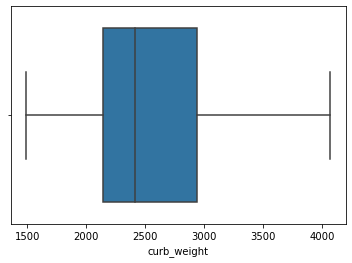

In [105]:
sns.boxplot(data.curb_weight)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


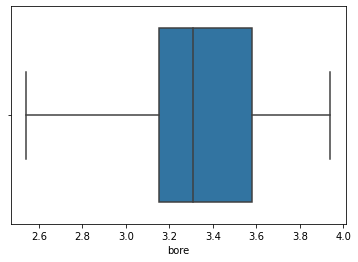

In [107]:
sns.boxplot(data.bore)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


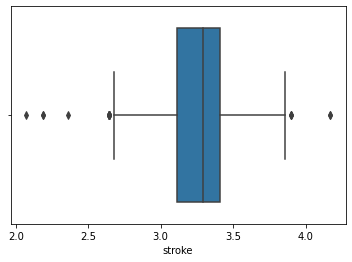

In [108]:
sns.boxplot(data.stroke)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


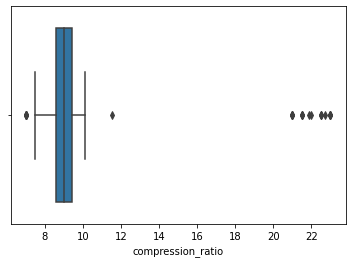

In [109]:
sns.boxplot(data.compression_ratio)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


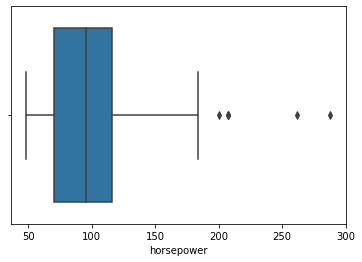

In [110]:
sns.boxplot(data.horsepower)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


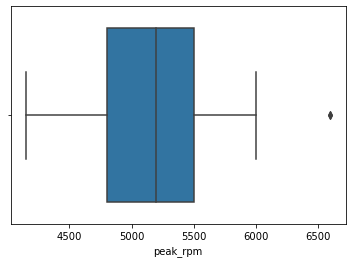

In [111]:
sns.boxplot(data.peak_rpm)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


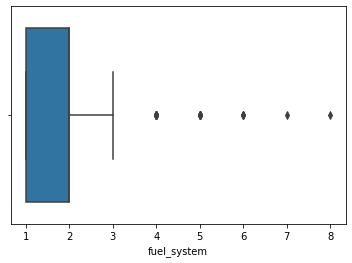

In [114]:
sns.boxplot(data.fuel_system)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


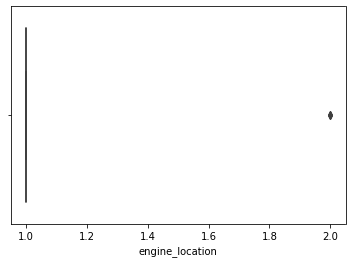

In [115]:
sns.boxplot(data.engine_location)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


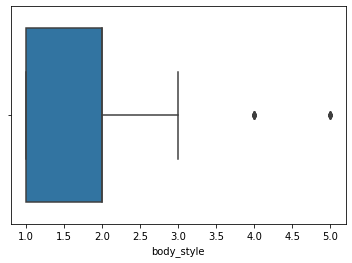

In [116]:
sns.boxplot(data.body_style)
plt.show()

In [40]:
    ##Handling the outliers
    data.wheel_base.value_counts()
    # Interquartile range (IQR) 
    from scipy import stats

    IQR = stats.iqr(data.wheel_base, interpolation = 'midpoint') 

    IQR
    ## min and max limit calculation
    # First quartile (Q1) 
    Q1 = data.wheel_base.quantile(0.25)
    # Third quartile (Q3) 
    Q3 =data.wheel_base.quantile(0.75)
    ##getting the limits
    min_limit=Q1 - 1.5*IQR

    max_limit=Q3 +1.5*IQR

In [39]:
min_limit

84.44999999999999

In [40]:
max_limit

111.25

In [25]:
## filetring the data
data.loc[data['wheel_base'] >max_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
70,-1,93.0,12,2,turbo,1,1,2,1,115.6,...,183,3,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0
71,-1,115.0,12,1,std,1,1,2,1,115.6,...,234,1,3.46,3.10,8.3,155.0,4750.0,16,18,34184.0
73,0,115.0,12,1,std,1,1,2,1,120.9,...,308,1,3.80,3.35,8.0,184.0,4500.0,14,16,40960.0


In [30]:
data.loc[data['wheel_base'] <min_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [41]:
# imputing the outliers as the count is high
data.loc[data['wheel_base'] > max_limit,'wheel_base']=np.median(data.wheel_base)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


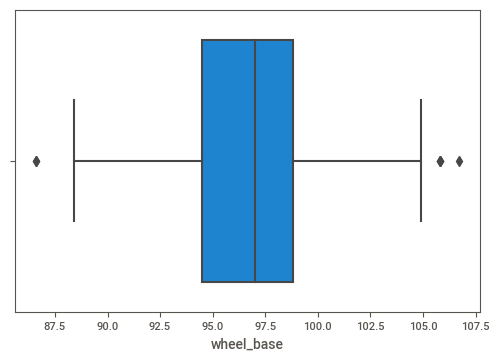

In [42]:
sns.boxplot(data.wheel_base)
plt.show()

In [43]:
    ##Handling the outliers
    data.length.value_counts()
    # Interquartile range (IQR) 
    from scipy import stats

    IQR = stats.iqr(data.length, interpolation = 'midpoint') 

    IQR
    ## min and max limit calculation
    # First quartile (Q1) 
    Q1 = data.length.quantile(0.25)
    # Third quartile (Q3) 
    Q3 =data.length.quantile(0.75)
    ##getting the limits
    min_limit=Q1 - 1.5*IQR

    max_limit=Q3 +1.5*IQR

In [59]:
data.loc[data['length'] <=min_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [61]:
data.loc[data['length'] >=max_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [44]:
# imputing the outlier
data.loc[data['length'] < min_limit,'length']=np.median(data.length)

{'whiskers': [<matplotlib.lines.Line2D at 0x193c3217af0>,
 'caps': [<matplotlib.lines.Line2D at 0x193c32251f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x193c3217790>],
 'medians': [<matplotlib.lines.Line2D at 0x193c32258b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x193c3225c10>],
 'means': []}

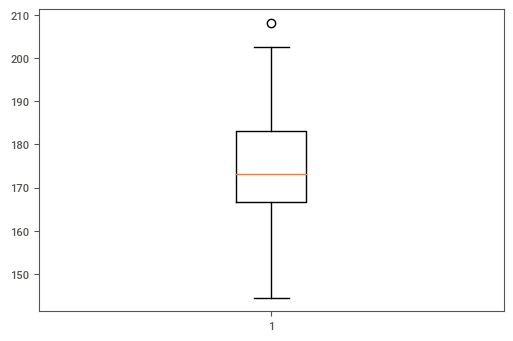

In [45]:
plt.boxplot(data.length)

In [46]:
    ##Handling the outliers
    data.peak_rpm.value_counts()
    # Interquartile range (IQR) 
    from scipy import stats

    IQR = stats.iqr(data.peak_rpm, interpolation = 'midpoint') 

    IQR
    ## min and max limit calculation
    # First quartile (Q1) 
    Q1 = data.peak_rpm.quantile(0.25)
    # Third quartile (Q3) 
    Q3 =data.peak_rpm.quantile(0.75)
    ##getting the limits
    min_limit=Q1 - 1.5*IQR

    max_limit=Q3 +1.5*IQR

In [98]:
data.loc[data['peak_rpm'] <=min_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [99]:
data.loc[data['peak_rpm'] >=max_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
165,1,168.0,1,1,1,2.0,1,2,NaN,94.5,...,98,1,3.24,3.08,9.4,112.0,6600.0,26,29,9298.0
166,1,168.0,1,1,1,2.0,2,2,NaN,94.5,...,98,1,3.24,3.08,9.4,112.0,6600.0,26,29,9538.0


In [47]:
data.loc[data['peak_rpm'] >= max_limit,'peak_rpm']=np.median(data.peak_rpm)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


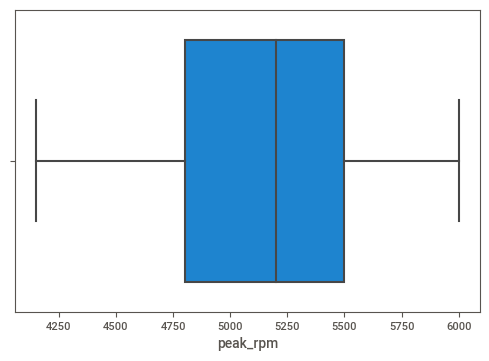

In [48]:
sns.boxplot(data.peak_rpm)
plt.show()

In [68]:
data.peak_rpm.value_counts()

5200.0    205
Name: peak_rpm, dtype: int64

In [79]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [49]:
    ##Handling the outliers
    data.city_mpg.value_counts()
    # Interquartile range (IQR) 
    from scipy import stats

    IQR = stats.iqr(data.city_mpg, interpolation = 'midpoint') 

    IQR
    ## min and max limit calculation
    # First quartile (Q1) 
    Q1 = data.city_mpg.quantile(0.25)
    # Third quartile (Q3) 
    Q3 =data.city_mpg.quantile(0.75)
    ##getting the limits
    min_limit=Q1 - 1.5*IQR

    max_limit=Q3 +1.5*IQR

In [103]:
data.loc[data['city_mpg'] <=min_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [104]:
data.loc[data['city_mpg'] >=max_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
18,2,121.0,18,1,1,2.0,2,1,NaN,88.4,...,61,2,2.91,3.03,9.5,48.0,5100.0,47,53,5151.0
30,2,137.0,4,1,1,2.0,2,1,NaN,86.6,...,92,4,2.91,3.41,9.6,58.0,4800.0,49,54,6479.0


In [50]:
data.loc[data['city_mpg'] >= max_limit,'city_mpg']=np.median(data.city_mpg)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city_mpg'>

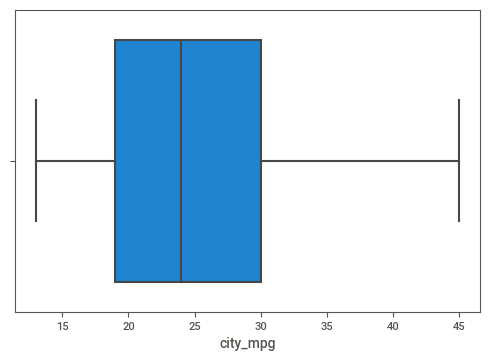

In [51]:
sns.boxplot(data.city_mpg)

In [52]:
    ##Handling the outliers
    data.highway_mpg.value_counts()
    # Interquartile range (IQR) 
    from scipy import stats

    IQR = stats.iqr(data.highway_mpg, interpolation = 'midpoint') 

    IQR
    ## min and max limit calculation
    # First quartile (Q1) 
    Q1 = data.highway_mpg.quantile(0.25)
    # Third quartile (Q3) 
    Q3 =data.highway_mpg.quantile(0.75)
    ##getting the limits
    min_limit=Q1 - 1.5*IQR

    max_limit=Q3 +1.5*IQR

In [108]:
data.loc[data['highway_mpg'] <=min_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [110]:
data.loc[data['highway_mpg'] >=max_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
18,2,121.0,18,1,1,2.0,2,1,NaN,88.4,...,61,2,2.91,3.03,9.5,48.0,5100.0,24.0,53,5151.0
30,2,137.0,4,1,1,2.0,2,1,NaN,86.6,...,92,4,2.91,3.41,9.6,58.0,4800.0,24.0,54,6479.0
90,1,128.0,2,2,1,2.0,1,1,NaN,94.5,...,103,3,2.99,3.47,21.9,55.0,4800.0,45.0,50,7099.0


In [53]:
data.loc[data['highway_mpg'] >= max_limit,'highway_mpg']=np.median(data.highway_mpg)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='highway_mpg'>

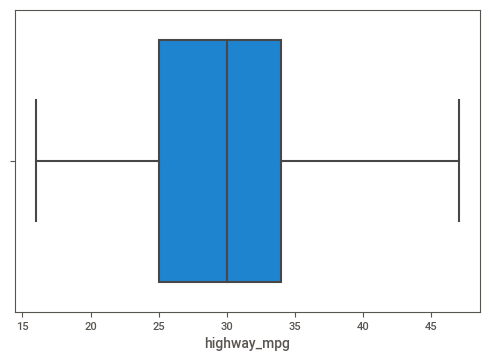

In [54]:
sns.boxplot(data.highway_mpg)

In [55]:
    ##Handling the outliers
    data.horsepower.value_counts()
    # Interquartile range (IQR) 
    from scipy import stats

    IQR = stats.iqr(data.horsepower, interpolation = 'midpoint') 

    IQR
    ## min and max limit calculation
    # First quartile (Q1) 
    Q1 = data.horsepower.quantile(0.25)
    # Third quartile (Q3) 
    Q3 =data.horsepower.quantile(0.75)
    ##getting the limits
    min_limit=Q1 - 1.5*IQR

    max_limit=Q3 +1.5*IQR

In [114]:
data.loc[data['horsepower'] >=max_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
49,0,115.0,20,1,1,2.0,1,2,NaN,102.0,...,326,1,3.54,2.76,11.5,262.0,5000.0,13.0,17.0,36000.0
105,3,194.0,2,1,2,2.0,2,2,NaN,91.3,...,181,1,3.43,3.27,7.8,200.0,5200.0,17.0,23.0,19699.0
126,3,115.0,16,1,1,2.0,4,2,NaN,89.5,...,194,1,3.74,2.90,9.5,207.0,5900.0,17.0,25.0,32528.0
127,3,115.0,16,1,1,2.0,4,2,NaN,89.5,...,194,1,3.74,2.90,9.5,207.0,5900.0,17.0,25.0,34028.0
128,3,115.0,16,1,1,2.0,5,2,NaN,89.5,...,194,1,3.74,2.90,9.5,207.0,5900.0,17.0,25.0,37028.0
129,1,115.0,16,1,1,2.0,2,2,NaN,98.4,...,203,1,3.94,3.11,10.0,288.0,5750.0,17.0,28.0,10295.0


In [117]:
data.loc[data['horsepower'] <=min_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [56]:
data.loc[data['horsepower'] >= max_limit,'horsepower']=np.median(data.horsepower)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horsepower'>

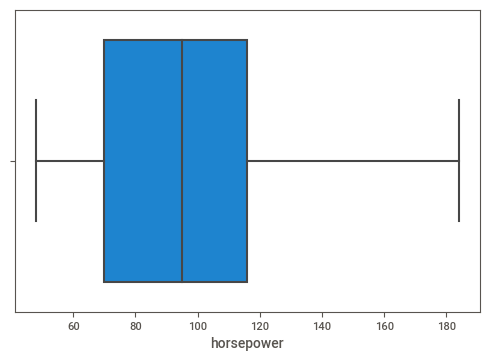

In [57]:
sns.boxplot(data.horsepower)

In [58]:
    ##Handling the outliers
    data.stroke.value_counts()
    # Interquartile range (IQR) 
    from scipy import stats

    IQR = stats.iqr(data.stroke, interpolation = 'midpoint') 

    IQR
    ## min and max limit calculation
    # First quartile (Q1) 
    Q1 = data.stroke.quantile(0.25)
    # Third quartile (Q3) 
    Q3 =data.stroke.quantile(0.75)
    ##getting the limits
    min_limit=Q1 - 1.5*IQR

    max_limit=Q3 +1.5*IQR

In [174]:
data.loc[data['stroke'] <min_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
202,-1,95.0,8,1,1,1,1,2,1,109.1,...,173,1,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0


In [170]:
data.loc[data['stroke'] >=max_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [59]:
data.loc[data['stroke'] >= max_limit,'stroke']=np.median(data.stroke)

In [60]:
data.loc[data['stroke'] <= min_limit,'stroke']=np.median(data.stroke)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


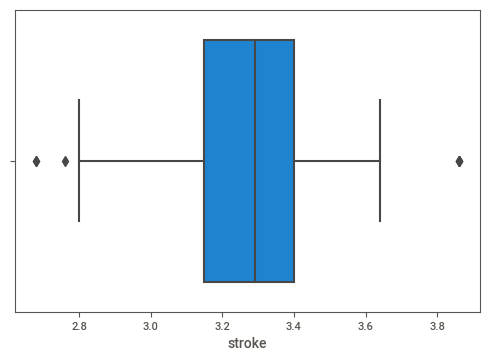

In [61]:
sns.boxplot(data.stroke)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stroke', ylabel='Density'>

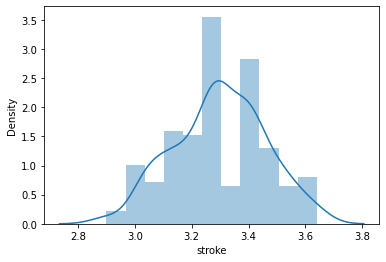

In [177]:
sns.distplot(data.stroke)

The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information. If our model doesn't work with accuracy, we will come back for more preprocessing.

## Feature Selection

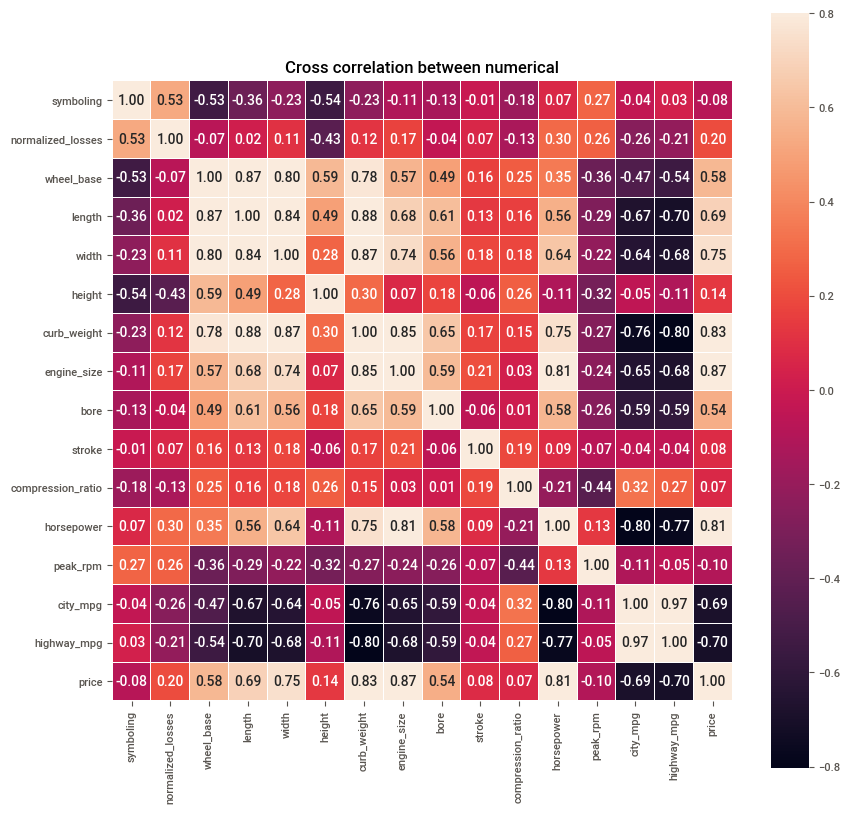

In [62]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(data1.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Cross correlation between numerical')
plt.show()
## City_mpg and highway_mpg are correlated to each other, so we will drop one of them

In [63]:
data2 = data.drop(['city_mpg'],axis=1)
data2.head()


,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,highway_mpg,price
0,3,115.0,19,1,1,2,5,2,1,88.6,...,1,130,1,3.47,2.68,9.0,111.0,5000.0,27.0,13495.0
1,3,115.0,19,1,1,2,5,2,1,88.6,...,1,130,1,3.47,2.68,9.0,111.0,5000.0,27.0,16500.0
2,1,115.0,19,1,1,2,2,2,1,94.5,...,2,152,1,2.68,3.47,9.0,154.0,5000.0,26.0,16500.0
3,2,164.0,14,1,1,1,1,1,1,99.8,...,1,109,1,3.19,3.40,10.0,102.0,5500.0,30.0,13950.0
4,2,164.0,14,1,1,1,1,3,1,99.4,...,3,136,1,3.19,3.40,8.0,115.0,5500.0,22.0,17450.0


In [64]:
## checking the duplicate rows
data.duplicated().sum()

0

In [65]:
## checking the constant features
data2.describe()
## the standard deviation of all features are not 1 ,so the there are constant features in the dataset.

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,highway_mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,120.600000,7.390244,1.097561,1.180488,1.434146,1.819512,1.458537,1.014634,97.03561,...,1.429268,126.907317,1.990244,3.329366,3.294683,10.142537,100.258537,5112.439024,30.424390,13150.307317
std,1.245307,31.805105,5.508808,0.297446,0.385535,0.496858,0.990944,0.581148,0.120377,3.68708,...,0.990703,41.642693,1.306058,0.270858,0.200635,3.972040,32.579413,454.016824,6.358597,7879.121326
min,-2.000000,65.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,86.60000,...,1.000000,61.000000,1.000000,2.540000,2.680000,7.000000,48.000000,4150.000000,16.000000,5118.000000
25%,0.000000,101.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,94.50000,...,1.000000,97.000000,1.000000,3.150000,3.150000,8.600000,70.000000,4800.000000,25.000000,7788.000000
50%,1.000000,115.000000,6.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,97.00000,...,1.000000,120.000000,2.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,30.000000,10295.000000
75%,2.000000,137.000000,11.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,98.80000,...,1.000000,141.000000,2.000000,3.580000,3.400000,9.400000,116.000000,5500.000000,34.000000,16500.000000
max,3.000000,256.000000,22.000000,2.000000,2.000000,2.000000,5.000000,3.000000,2.000000,106.70000,...,7.000000,326.000000,8.000000,3.940000,3.860000,23.000000,184.000000,6000.000000,47.000000,45400.000000


## Model Creation

In [62]:
data.symboling


0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64

In [66]:
## Defining X and y and creating dependent and independent variables
X = data.drop(columns = ['symboling']) ## independent variable
y = data['symboling'] ## Dependent or target variable"

In [67]:
X

,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,115.0,19,1,1,2,5,2,1,88.6,168.8,...,130,1,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,115.0,19,1,1,2,5,2,1,88.6,168.8,...,130,1,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,115.0,19,1,1,2,2,2,1,94.5,171.2,...,152,1,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,14,1,1,1,1,1,1,99.8,176.6,...,109,1,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,14,1,1,1,1,3,1,99.4,176.6,...,136,1,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,8,1,1,1,1,2,1,97.0,188.8,...,141,1,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,95.0,8,1,2,1,1,2,1,97.0,188.8,...,141,1,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,95.0,8,1,1,1,1,2,1,97.0,188.8,...,173,1,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,95.0,8,2,2,1,1,2,1,97.0,188.8,...,145,3,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [69]:
y

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64

In [68]:
## Balacing the data
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(y))
X_sm,y_sm=sm.fit_resample(X,y)
print(Counter(y_sm))

Counter({0: 67, 1: 54, 2: 32, 3: 27, -1: 22, -2: 3})


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 6

In [70]:
## scaling the data as all features seems to be near to normal distribution
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()## objet creation
X_scaled = scalar.fit_transform(X)

In [71]:
X_scaled

array([[-0.17650339,  2.11264888, -0.32879797, ..., -0.65099994,
        -0.53986329,  0.0438547 ],
       [-0.17650339,  2.11264888, -0.32879797, ..., -0.65099994,
        -0.53986329,  0.42617603],
       [-0.17650339,  2.11264888, -0.32879797, ..., -0.97769514,
        -0.69751568,  0.42617603],
       ...,
       [-0.80687262,  0.11095845, -0.32879797, ..., -1.14104274,
        -1.17047284,  1.0604096 ],
       [-0.80687262,  0.11095845,  3.04138127, ...,  0.16573805,
        -0.53986329,  1.18572957],
       [-0.80687262,  0.11095845, -0.32879797, ..., -0.97769514,
        -0.85516807,  1.20544997]])

In [72]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.20,random_state = 355)

In [73]:
## Model Creation
## model creation
from xgboost import XGBClassifier
xgb_c=XGBClassifier()
xgb_c.fit(X_train,y_train)
y_hat=xgb_c.predict(X_test)


NameError: name 'X_train' is not defined

In [205]:
##Model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='ovr')## object Creation

log_reg.fit(x_train,y_train)## fitting the model with training data

LogisticRegression(multi_class='ovr')

Let's see how well our model performs on the test data set.

In [206]:
y_pred = log_reg.predict(x_test)

In [207]:
y_pred

array([ 2,  1,  0,  2,  1,  1,  0,  1,  3,  1,  1,  1,  1,  3,  1,  0,  3,
        1,  1,  2,  3,  0,  2, -1,  1,  0,  1,  0,  0,  1,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  1,  3], dtype=int64)

In [210]:
pd.crosstab(y_test,y_pred)

col_0,-1,0,1,2,3
symboling,,,,,
-1,1,5,0,0,0
0,0,6,3,1,0
1,0,2,11,1,1
2,0,2,1,1,0
3,0,0,1,1,4


In [211]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.5609756097560976

In [212]:
# Precison
Precision = precision_score(y_test,y_pred,average='weighted')
Precision

0.6368902439024391

In [213]:
# Recall
Recall = recall_score(y_test,y_pred,average='weighted')
Recall

0.5609756097560976

In [214]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.17      0.29         6
           0       0.40      0.60      0.48        10
           1       0.69      0.73      0.71        15
           2       0.25      0.25      0.25         4
           3       0.80      0.67      0.73         6

    accuracy                           0.56        41
   macro avg       0.63      0.48      0.49        41
weighted avg       0.64      0.56      0.55        41



For This dataset checking False Negative(FN case in confusion matrix) is more importan means cars are having risk factors
but if my model predict not having Risk is more important, so we must check recall value. We must try to increase recall value
to build a good model for this dataset.